In [1]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
#graph
import seaborn as sns

#pandas 
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
#stat
from scipy import stats

#Flow
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
#from sklearn.pipeline import Pipeline
from dask_searchcv import GridSearchCV,RandomizedSearchCV
from sklearn.externals import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB


#imbalance
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.ensemble import EasyEnsemble
from imblearn.ensemble import BalanceCascade
from imblearn.pipeline import Pipeline 


#Model
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

#metric
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix,f1_score,roc_auc_score,precision_recall_curve,average_precision_score, fbeta_score



In [194]:
#Resampler
rus=RandomUnderSampler()
ros = RandomOverSampler()
ee = EasyEnsemble(n_subsets=3)
bc = BalanceCascade(random_state=0,
                    estimator=LogisticRegression(random_state=0),
                    n_max_subset=4)
sm = SMOTEENN(random_state=0)
st= SMOTETomek(random_state=99)

In [195]:
clf_result={}
# import dask_searchcv as dcv


# from dask.distributed import Client
# # Create a local cluster, and set as the default scheduler
# client = Client()
# client

In [196]:
#Model dictionary
model_dic = pd.read_csv('/app/recom/model_dic.csv', dtype = object)

In [197]:
invoice=['mem_mob_sum','mem_nowtv_sum','mem_pcd_sum','mem_lts_sum']

int_feature=['pvi','hh_number','age','number_redeem','point','mem_mob_sum','mem_nowtv_sum','mem_pcd_sum','mem_lts_sum']
cat_int=['cat_'+i for i in int_feature]
#cat_feature=['tier','gender','building_type','PRT5_category','PRT6_category','M34_1_category','M79_category','M81_category','M83_category']#,'hkt_tenure_category','opt_out_marketing','club_engage','bill_dispute']
cat_feature=['tier','gender','building_type','PRT5_category',
 'PRT6_category',
 'CL26_category',
 'CL21_category',
 'SC1_category',
 'SC2_category',
 'SC3_category',
 'M34_1_category',
 'M42_category',
 'M35_category',
 'M61_category',
 'M32_category',
 'M36_category',
 'M51_category',
 'M59_category',
 'M68_1_category',
 'M68_2_category',
 'M79_category',
 'M33_category',
 'M81_category',
 'M83_category',
 'M85_category',
 'C42_category',
 'C46_category',
 'C47_category',
 'C62_category',
 'C66_category',
 'C67_1_category',
 'C67_2_category',
 'C67_3_category',
 'C79_category',
 'C83_category',
 'C89_category',
 'C95_category',
 'C45_category',
 'C64_category',
 'C99_category',
 'C100_category']#,'hkt_tenure_category','opt_out_marketing','club_engage','bill_dispute']

#label encoded features
le_cat=['le_'+i for i in cat_feature]

product=['idd', '1010', 'tgo', 'pcd', 'nowtv', 'csl', 'clubsim', 'eye','fixed']
y_product=['y_'+i for i in product]
new_y=['new_'+i for i in y_product]

scoring='accuracy'
cv=5
resample=st
n=50000
single_y=False
test_size=0.25

In [198]:
df.columns.tolist()

['member_id',
 'Y_train',
 'X_train',
 'PRT5_category',
 'PRT6_category',
 'CL26_category',
 'CL21_category',
 'SC1_category',
 'SC2_category',
 'SC3_category',
 'M34_1_category',
 'M42_category',
 'M35_category',
 'M61_category',
 'M32_category',
 'M36_category',
 'M51_category',
 'M59_category',
 'M68_1_category',
 'M68_2_category',
 'M79_category',
 'M33_category',
 'M81_category',
 'M83_category',
 'M85_category',
 'C42_category',
 'C46_category',
 'C47_category',
 'C62_category',
 'C66_category',
 'C67_1_category',
 'C67_2_category',
 'C67_3_category',
 'C79_category',
 'C83_category',
 'C89_category',
 'C95_category',
 'C45_category',
 'C64_category',
 'C99_category',
 'C100_category',
 'tier',
 'age',
 'gender',
 'point',
 'pvi',
 'hh_number',
 'building_type',
 'number_redeem',
 'reg_date',
 'mem_mob_sum',
 'mem_nowtv_sum',
 'mem_pcd_sum',
 'mem_lts_sum',
 'y_idd',
 'y_1010',
 'y_tgo',
 'y_pcd',
 'y_nowtv',
 'y_csl',
 'y_clubsim',
 'y_eye',
 'y_fixed',
 'cat_pvi',
 'cat_hh_numb

In [199]:
member_filter=pd.read_csv('/app/recom/201801.csv',dtype=object)

In [200]:
member_filter.head()

,member_id
0,8000034788
1,8000070139
2,8000078546
3,8000089733
4,8000122708


In [201]:
df_raw=pd.read_pickle('/app/recom/recom_201712.pickle')
#df_raw=df_raw[df_raw.member_id.isin(member_filter.member_id)]
df_raw[int_feature]=df_raw[int_feature].replace(['.',np.nan],'-1').astype(int)
df_raw['building_type'].replace(['.',np.nan],'-1',inplace=True)

In [202]:
df_raw.building_type.fillna('-1',inplace=True)

In [203]:
df_raw.shape

(197181, 54)

In [204]:
"""
df=df_raw[(df_raw['X_train']!='') & (df_raw['X_train'].str.len() != 0)]\
    .sort_values(['pvi','hh_number'],ascending=False,na_position='last')\
    .drop_duplicates(['member_id']).copy()
"""
df=df_raw[(df_raw['X_train'].str.len() != 0)]\
.sort_values(['pvi','hh_number'],ascending=False,na_position='last')\
.drop_duplicates(['member_id']).copy()

In [205]:
del df_raw

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157064 entries, 94894 to 197170
Data columns (total 54 columns):
member_id         157064 non-null object
Y_train           157064 non-null object
X_train           157064 non-null object
PRT5_category     143610 non-null object
PRT6_category     143610 non-null object
CL26_category     143610 non-null object
CL21_category     143610 non-null object
SC1_category      143610 non-null object
SC2_category      143610 non-null object
SC3_category      143610 non-null object
M34_1_category    105791 non-null object
M42_category      105791 non-null object
M35_category      105791 non-null object
M61_category      105791 non-null object
M32_category      105791 non-null object
M36_category      105791 non-null object
M51_category      105791 non-null object
M59_category      105791 non-null object
M68_1_category    105791 non-null object
M68_2_category    105791 non-null object
M79_category      105791 non-null object
M33_category      105791

In [207]:
# #Other data DLC
# hi_tenure=pd.read_csv('/home/h1549716/HI/hi_tenure.csv', dtype={'member_id': object, 'hkt_tenure_category':object})
# hi_opt_out_marketing=pd.read_csv('/home/h1549716/HI/hi_opt_out_marketing.csv', dtype={'member_id': object, 'opt_out_marketing':object})
# hi_club_engage=pd.read_csv('/home/h1549716/HI/hi_club_engage.csv', dtype={'member_id': object, 'club_engage':object})
# hi_bill_dispute=pd.read_csv('/home/h1549716/HI/hi_bill_dispute.csv', dtype={'member_id': object, 'bill_dispute':object})

# for i in [hi_tenure,hi_opt_out_marketing,hi_club_engage,hi_bill_dispute]:
#     df=df.merge(i,how='left',on='member_id')

In [208]:
for i in invoice:
    df.loc[df[i]<=1,i]=-1

def explode_y(y_train,service):
    if service in y_train:
        #print(service)
        return 1
    else:
        return 0

for i in product:
    df.loc[:,'y_'+i]=df['Y_train'].apply(lambda x: explode_y(x,i))

In [209]:
df.head()

,member_id,Y_train,X_train,PRT5_category,PRT6_category,CL26_category,CL21_category,SC1_category,SC2_category,SC3_category,M34_1_category,M42_category,M35_category,M61_category,M32_category,M36_category,M51_category,M59_category,M68_1_category,M68_2_category,M79_category,M33_category,M81_category,M83_category,M85_category,C42_category,C46_category,C47_category,C62_category,C66_category,C67_1_category,C67_2_category,C67_3_category,C79_category,C83_category,C89_category,C95_category,C45_category,C64_category,C99_category,C100_category,tier,age,gender,point,pvi,hh_number,building_type,number_redeem,reg_date,mem_mob_sum,mem_nowtv_sum,mem_pcd_sum,mem_lts_sum,y_idd,y_1010,y_tgo,y_pcd,y_nowtv,y_csl,y_clubsim,y_eye,y_fixed
94894,8003746529,[clubsim],"[[nowtv, pcd], [csl], [1010]]",More than five subscriptions,Twelve to twenty years,Redemption,No event attendance,No categories,No categories,No categories,Active WiFi use,No Moov renewed,No value,One SIM or none,No network complaints,No bill dispute,CSL customer,Usage 30% to 50%,No CS calls,No repeated CS calls,Three or four campaign responses,Drop and redial rate below 2%,Active roamer,No handset change,No plan termination,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,PLATINUM,55,MALE,505,1000,3,HSE,43,2015-03-23,2137,1936,1496,-1,0,0,0,0,0,0,1,0,0
193250,8009739049,[clubsim],[[1010]],Two to three subscriptions,Three to six years,Activated,No event attendance,No categories,No categories,No categories,Active WiFi use,No Moov renewed,No value,One SIM or none,No network complaints,No bill dispute,1010 customer no concierge usage,Usage over 100%,No CS calls,No repeated CS calls,Optout or not targeted,Drop and redial rate between 2% and 5%,Active roamer,Handset change from CSL channel,No plan termination,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,PLATINUM,25,MALE,5608,1000,3,HSE,12,2017-01-13,3734,-1,-1,-1,0,0,0,0,0,0,1,0,0
36009,8010989393,[clubsim],"[[fixed], [nowtv], [idd]]",Four to five subscriptions,More than twenty years,Redemption,No event attendance,No categories,No categories,No categories,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,PLATINUM,-1,FEMALE,3004,1000,2,EST,18,2016-07-02,-1,50,468,565,0,0,0,0,0,0,1,0,0
37701,8013002301,[nowtv],"[[pcd], [idd]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATINUM,-1,MALE,1172,1000,2,SBLDG,31,2017-12-05,-1,-1,-1,-1,0,0,0,0,1,0,0,0,0
52964,8008320312,[clubsim],"[[nowtv], [idd], [csl]]",Two to three subscriptions,Twelve to twenty years,Redemption,No event attendance,No categories,No categories,No categories,No active WiFi use,No Moov renewed,No value,One SIM or none,No network complaints,No bill dispute,CSL customer,Unlimited,One CS call,No repeated CS calls,No campaign response,Drop and redial rate between 2% and 5%,Non traveller,No handset change,No plan termination,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,PLATINUM,51,FEMALE,811,1000,2,SBLDG,12,2015-09-18,404,-1,-1,-1,0,0,0,0,0,0,1,0,0


In [210]:
df.loc[(df.y_idd!=0)|(df.y_eye!=0)|(df.y_fixed!=0),'mem_lts_sum']=-1
df.loc[(df.y_csl!=0)|(df.y_1010!=0),'mem_mob_sum']=-1
df.loc[(df.y_pcd!=0),'mem_pcd_sum']=-1
df.loc[(df.y_nowtv!=0),'mem_nowtv_sum']=-1

df.replace([-1,'-1',-1.0,'UNKNOWN','00_Unknown','No value'],np.nan,inplace=True)
df.dropna(thresh=9,inplace=True,axis=0)

for i in int_feature:
    binsize=5
    print i
    if re.match("^mem", i):
        binsize=20
    df['cat_'+i]=pd.qcut(df[i].replace([-1,'-1'],np.nan),binsize,duplicates ='drop',labels=False)
    print df['cat_'+i].value_counts()

pvi
0.0    42516
2.0    14085
1.0    13937
Name: cat_pvi, dtype: int64
hh_number
0.0    101716
1.0      7069
Name: cat_hh_number, dtype: int64
age
0.0    31018
3.0    28096
4.0    27128
2.0    26895
1.0    26623
Name: cat_age, dtype: int64
number_redeem
0.0    42854
3.0    29341
4.0    28841
1.0    24656
2.0    23397
Name: cat_number_redeem, dtype: int64
point
1.0    31462
3.0    31420
0.0    31415
4.0    31404
2.0    31358
Name: cat_point, dtype: int64
mem_mob_sum
0.0     6908
5.0     6520
7.0     5717
2.0     5049
11.0    4813
12.0    4802
15.0    4801
17.0    4765
18.0    4759
9.0     4757
13.0    4750
19.0    4749
10.0    4744
4.0     4713
16.0    4708
14.0    4667
3.0     4540
8.0     3668
6.0     3164
1.0     2624
Name: cat_mem_mob_sum, dtype: int64
mem_nowtv_sum
0.0     26923
3.0      3117
5.0      2764
8.0      2560
10.0     2532
9.0      2514
7.0      2495
6.0      2361
4.0      1932
2.0      1867
1.0      1695
Name: cat_mem_nowtv_sum, dtype: int64
mem_pcd_sum
2.0     5496
8.0

In [211]:
if single_y==True:
    _list=[]
    df['final_y']=''
    for i in product:
        df.loc[df['y_'+i]==1,'final_y']=i
        _list.append(df[df['y_'+i]==1])

    df=pd.concat(_list,ignore_index=True)

In [212]:
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.cols]

In [213]:
from sklearn.metrics import get_scorer
class ClassifierWrapper(BaseEstimator, TransformerMixin):
    
    def __init__(self, estimator, verbose=None, fit_params=None, use_proba=True, scoring=None):
        self.estimator = estimator
        self.verbose = verbose #True = 1, False = 0, 1 - moderately verbose, 2- extra verbose    
        if verbose is None:
            self.verbose=0
        else:
            self.verbose=verbose
        self.fit_params= fit_params
        self.use_proba = use_proba #whether to use predict_proba in transform
        self.scoring = scoring # calculate validation score, takes score function name
        #TODO check if scorer imported?
        self.score = None #variable to keep the score if scoring is set.

    def fit(self,X,y):
        fp=self.fit_params
        if self.verbose==2: print("X: ", X.shape, "\nFit params:", self.fit_params)
        if fp is not None:
            self.estimator.fit(X,y, **fp)
        else:
            self.estimator.fit(X,y)
        
        return self
    
    def transform(self, X):
        if self.use_proba:
            return self.estimator.predict_proba(X) #[:, 1].reshape(-1,1)
        else:
            return self.estimator.predict(X)
    
    def fit_transform(self,X,y,**kwargs):
        self.fit(X,y)
        p = self.transform(X)
        
        if self.scoring is not None:
            self.score = eval(self.scoring+"(y,p)")
            #TODO print own instance name?
            if self.verbose >0: print("score: ", self.score) 
        return p
    
    def predict(self,X):
        return self.estimator.predict(X)
    
    def predict_proba(self,X):
        try:
            return self.estimator.predict_proba(X)
        except:
            pass

In [214]:
df.fillna(-1,inplace=True)
def explode_x(x_train,service):
    for i, el in enumerate(x_train):
        if service in el:
            #print(service)
            return i+1
    return 0

for i in product:
    df.loc[:,i]=df['X_train'].apply(lambda x: explode_x(x,i))

In [215]:
classes_={}
if single_y==True:
    for i in cat_feature+ ['final_y']:
        le=LabelEncoder()
        df['le_'+i]=le.fit_transform(df[i])
        classes_[i]=le.classes_
else:
    for i in cat_feature:
        le=LabelEncoder()
        df['le_'+i]=le.fit_transform(df[i])
        classes_[i]=le.classes_
  

In [216]:
#df=df.filter(regex='^(?!y_).*')

In [217]:
def gen_pipeline(dic):
    #lis_pipe = [('features', transformer)]
    #lis_pipe = [('PCA',PCA())]
    lis_pipe = []
    for w in dic.keys()[:-1]:
        if len(dic[w]) == 1:
            lis_pipe.append(('est{}'.format(w), ClassifierWrapper(dic[w].keys()[0])))
        else:
            lis_union = []
            for v in dic[w].keys():
                lis_union.append((str(v)[0:2], ClassifierWrapper(v)))
            lis_pipe.append(('est{}'.format(w),FeatureUnion(lis_union)))
    lis_pipe.append(('est{}'.format(dic.keys()[-1]), dic[dic.keys()[-1]].keys()[0]))
    return Pipeline(lis_pipe)

In [218]:
def gen_param(dic):
    #dic_param = {'PCA__n_components':[9,12]}
    dic_param = {}
    for w in dic.keys()[:-1]:
        if len(dic[w]) == 1:
            for v in dic[w].items()[0][1].keys():
                dic_param['est{}__estimator__{}'.format(w,v)]=dic[w].items()[0][1][v]
        else:
            for m in dic[w].items():
                for v in m[1].keys():
                    dic_param['est{}__{}__estimator__{}'.format(w,str(m[0])[0:2],v)]=m[1][v]
    for v in dic[dic.keys()[-1]].items()[0][1].keys():
                dic_param['est{}__{}'.format(dic.keys()[-1],v)]=dic[dic.keys()[-1]].items()[0][1][v]
    return dic_param

In [219]:
from imblearn.ensemble import BalancedBaggingClassifier
import warnings

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score':make_scorer(f1_score),
    'roc_auc_score':make_scorer(roc_auc_score),
    'fbeta_score':make_scorer(fbeta_score, beta=2, pos_label=1)
}

test_df=df.sample(n=50000,random_state=2).drop_duplicates('member_id')
features=test_df[product+le_cat+cat_int]


dic={}
"""
dic['y_csl']= {1:{LogisticRegression():{'C': [0.001, 0.01,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
dic['y_1010']= {1:{RandomForestClassifier():{}}}
dic['y_eye']= {1:{LogisticRegression():{'C': [0.001, 0.01,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
dic['y_idd']= {1:{LogisticRegression():{'C': [0.001, 0.01,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
dic['y_tgo']= {1:{LogisticRegression():{'C': [0.001, 0.01,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
dic['y_pcd']= {1:{LogisticRegression():{'C': [0.001, 0.01,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
dic['y_nowtv']= {1:{LogisticRegression():{'C': [0.001, 0.01,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
dic['y_clubsim']= {1:{LogisticRegression():{'C': [0.001, 0.01,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
dic['y_fixed']= {1:{RandomForestClassifier():{}}}
"""

dic['y_csl']= {1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_1010']={1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_eye']= {1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_idd']= {1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_tgo']= {1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_pcd']= {1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_nowtv']={1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_clubsim']={1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}
dic['y_fixed']={1:{XGBClassifier():{'n_estimators':[100],'missing':[-1]}}}



#n=100000
class multi_clf():
    def __init__(self,dic=dic):
        self.y_prod={}
        self.dic=dic
        self.output={}
        self.clf={}
        self.pred={}
        self.pred_prob={}
        self.output_2={}
        self.clf_2={}
        self.pred_2={}
        self.pred_prob_2={}
        self.X_train={}
        self.X_test={}
        self.y_train={}
        self.y_test={}
        self._features={}
        self._importance={}


        
    def gen_data(self,y,test_size=test_size):
        print ('Start {}:'.format(y))
        print ('test Size {}'.format(test_size))
        regex = re.compile(r'(.*(?!{}).*)'.format(y[2:]))
        self._features[y]=list(features.columns)
        
        #print (self._features[y])
        X_train, self.X_test[y], y_train, self.y_test[y] = train_test_split(features, test_df[y], test_size=test_size, random_state=100,stratify=None)
        X_train_col=X_train.columns
        if resample!=False:
            X_train,y_train= resample.fit_sample(X_train,y_train)
            X_train=pd.DataFrame(X_train,columns=X_train_col)
        else:
            pass

        print ('Train {}'.format(str(len(X_train))))
        print ('')
        display(test_df[y].value_counts())
        return  X_train, self.X_test[y], y_train, self.y_test[y]

    def grid_search(self,y,test_size=test_size,resample=resample,cv=cv):
        dic=self.dic[y]
        X_train, X_test, y_train, y_test=self.gen_data(y,test_size)

        
        #print ('Resample: {}'.format(str(resample)))
        print ('CV: {}'.format(str(cv)))
        

        skf = StratifiedKFold(n_splits=cv)
        warnings.filterwarnings('ignore')
        
        self.clf[y]=GridSearchCV(gen_pipeline(self.dic[y]), gen_param(self.dic[y]), scoring=scorers, refit='fbeta_score',cv=skf, n_jobs = -1,return_train_score=True)
        self.y_prod[y]=self.clf[y].fit(X_train,y_train)

        self.output[y]=pd.DataFrame(self.clf[y].cv_results_).filter(regex='^(mean|params).*').sort_values('mean_test_f1_score',ascending=False)
        
        #display(output[y]['params'].apply(pd.Series))

        self.pred[y] =self.clf[y].predict(X_test)
        #want positive only
        self.pred_prob[y] =self.clf[y].predict_proba(X_test)[:, 1]
        
        pd.DataFrame(data=zip(X_train.columns,self.clf[y].best_estimator_.steps[0][1].feature_importances_),columns=['col','importance'])\
            .sort_values('importance',ascending=False).plot.bar(x='col',y='importance')
        plt.show()
        
        importance=pd.DataFrame(data=zip(X_train.columns,multi_clf.clf['y_idd'].best_estimator_.steps[0][1].feature_importances_),columns=['col','importance'])\
            .sort_values('importance',ascending=False)
        self._importance[y]=importance[((importance['importance'].max()-importance['importance'])/importance['importance'].max())<0.5]
        
        ##########################################################################################################################################################
        #Use less columns and try again
        """
        X_train=X_train[self._importance[y]['col'].values]
        print (self._importance[y])
        self.clf_2[y]=GridSearchCV(gen_pipeline(self.dic[y]), gen_param(self.dic[y]), scoring=scorers, refit='fbeta_score',cv=skf, n_jobs = -1,return_train_score=True)
        self.clf_2[y].fit(X_train,y_train)
        self.output_2[y]=pd.DataFrame(self.clf_2[y].cv_results_).filter(regex='^(mean|params).*').sort_values('mean_test_f1_score',ascending=False)
        self.pred_2[y] =self.clf_2[y].predict(X_test[self._importance[y]['col'].values])
        self.pred_prob_2[y] =self.clf_2[y].predict_proba(X_test[self._importance[y]['col'].values])[:, 1]
        """
    def result(self,y):
        display(self.output[y].head())
        print (self.clf[y].best_params_)
        print ('Confusion Matrix for {}'.format(y))
        print(pd.DataFrame(confusion_matrix(self.y_test[y], self.pred[y]),
                           columns=['pred_0', 'pred_1'], 
                           index=['0', '1']))
        print ('')
        print classification_report_imbalanced(self.y_test[y], self.pred[y])
        print ('')
        print ('ROC for {}'.format(roc_auc_score(self.y_test[y], self.pred_prob[y])))
        """
        display(self.output_2[y].head())
        print (self.clf_2[y].best_params_)
        print ('Confusion Matrix for {} [ver2]'.format(y))
        print(pd.DataFrame(confusion_matrix(self.y_test[y], self.pred_2[y]),
                           columns=['pred_0', 'pred_1'], 
                           index=['0', '1']))
        print ('')
        print classification_report_imbalanced(self.y_test[y], self.pred_2[y])
        print ('')
        print ('ROC for {}'.format(roc_auc_score(self.y_test[y], self.pred_prob_2[y])))
        """

In [220]:
multi_clf=multi_clf()

Start y_idd:
test Size 0.2
Train 76062



0    47513
1     2487
Name: y_idd, dtype: int64

CV: 5


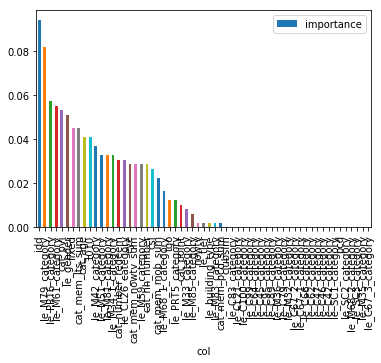

Start y_1010:
test Size 0.2
Train 79436



0    49651
1      349
Name: y_1010, dtype: int64

CV: 5


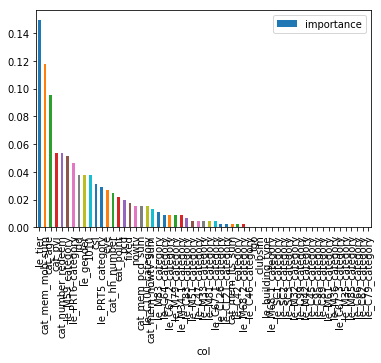

Start y_tgo:
test Size 0.2
Train 78302



0    48922
1     1078
Name: y_tgo, dtype: int64

CV: 5


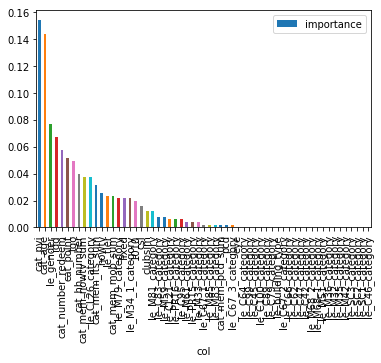

Start y_pcd:
test Size 0.2
Train 77464



0    48449
1     1551
Name: y_pcd, dtype: int64

CV: 5


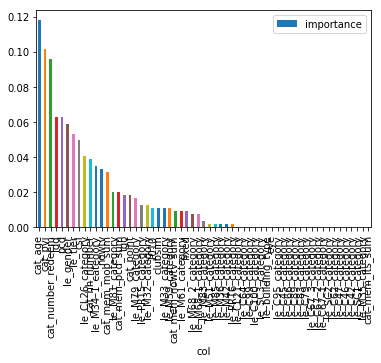

Start y_nowtv:
test Size 0.2
Train 78496



0    49083
1      917
Name: y_nowtv, dtype: int64

CV: 5


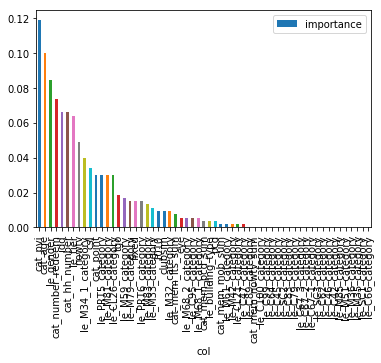

Start y_csl:
test Size 0.2
Train 78514



0    49071
1      929
Name: y_csl, dtype: int64

CV: 5


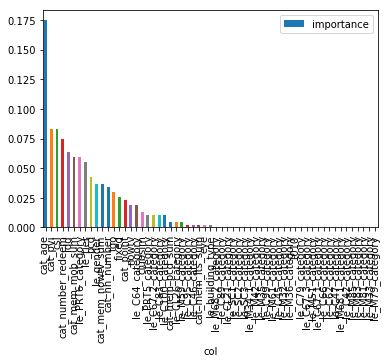

Start y_clubsim:
test Size 0.2
Train 71158



1    44452
0     5548
Name: y_clubsim, dtype: int64

CV: 5


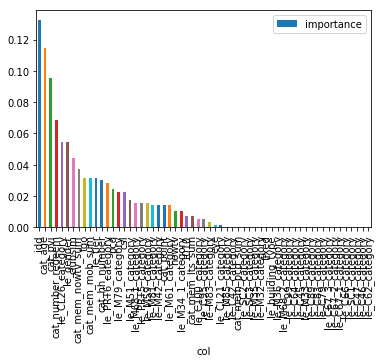

Start y_eye:
test Size 0.2
Train 79840



0    49898
1      102
Name: y_eye, dtype: int64

CV: 5


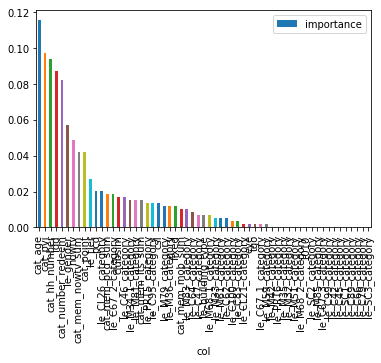

Start y_fixed:
test Size 0.2
Train 79276



0    49554
1      446
Name: y_fixed, dtype: int64

CV: 5


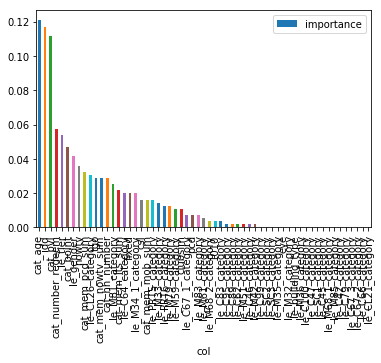

CPU times: user 20min 31s, sys: 11.7 s, total: 20min 42s
Wall time: 13min 45s


In [221]:
%%time

for i in product:
    multi_clf.grid_search('y_'+i,test_size=0.2,cv=cv,resample=rus)

In [222]:
df.head()

,member_id,Y_train,X_train,PRT5_category,PRT6_category,CL26_category,CL21_category,SC1_category,SC2_category,SC3_category,M34_1_category,M42_category,M35_category,M61_category,M32_category,M36_category,M51_category,M59_category,M68_1_category,M68_2_category,M79_category,M33_category,M81_category,M83_category,M85_category,C42_category,C46_category,C47_category,C62_category,C66_category,C67_1_category,C67_2_category,C67_3_category,C79_category,C83_category,C89_category,C95_category,C45_category,C64_category,C99_category,C100_category,tier,age,gender,point,pvi,hh_number,building_type,number_redeem,reg_date,mem_mob_sum,mem_nowtv_sum,mem_pcd_sum,mem_lts_sum,y_idd,y_1010,y_tgo,y_pcd,y_nowtv,y_csl,y_clubsim,y_eye,y_fixed,cat_pvi,cat_hh_number,cat_age,cat_number_redeem,cat_point,cat_mem_mob_sum,cat_mem_nowtv_sum,cat_mem_pcd_sum,cat_mem_lts_sum,idd,1010,tgo,pcd,nowtv,csl,clubsim,eye,fixed,le_tier,le_gender,le_building_type,le_PRT5_category,le_PRT6_category,le_CL26_category,le_CL21_category,le_SC1_category,le_SC2_category,le_SC3_category,le_M34_1_category,le_M42_category,le_M35_category,le_M61_category,le_M32_category,le_M36_category,le_M51_category,le_M59_category,le_M68_1_category,le_M68_2_category,le_M79_category,le_M33_category,le_M81_category,le_M83_category,le_M85_category,le_C42_category,le_C46_category,le_C47_category,le_C62_category,le_C66_category,le_C67_1_category,le_C67_2_category,le_C67_3_category,le_C79_category,le_C83_category,le_C89_category,le_C95_category,le_C45_category,le_C64_category,le_C99_category,le_C100_category
94894,8003746529,[clubsim],"[[nowtv, pcd], [csl], [1010]]",More than five subscriptions,Twelve to twenty years,Redemption,No event attendance,No categories,No categories,No categories,Active WiFi use,No Moov renewed,-1,One SIM or none,No network complaints,No bill dispute,CSL customer,Usage 30% to 50%,No CS calls,No repeated CS calls,Three or four campaign responses,Drop and redial rate below 2%,Active roamer,No handset change,No plan termination,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,PLATINUM,55.0,MALE,505.0,1000.0,3.0,HSE,43.0,2015-03-23,2137.0,1936.0,1496.0,-1.0,0,0,0,0,0,0,1,0,0,2.0,1.0,3.0,4.0,1.0,19.0,10.0,17.0,-1.0,0,3,0,1,1,2,0,0,0,3,2,6,2,6,3,2,1,1,1,1,2,0,1,1,3,3,3,1,2,5,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193250,8009739049,[clubsim],[[1010]],Two to three subscriptions,Three to six years,Activated,No event attendance,No categories,No categories,No categories,Active WiFi use,No Moov renewed,-1,One SIM or none,No network complaints,No bill dispute,1010 customer no concierge usage,Usage over 100%,No CS calls,No repeated CS calls,Optout or not targeted,Drop and redial rate between 2% and 5%,Active roamer,Handset change from CSL channel,No plan termination,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,PLATINUM,25.0,MALE,5608.0,1000.0,3.0,HSE,12.0,2017-01-13,3734.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,1,0,0,2.0,1.0,0.0,2.0,4.0,19.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0,0,0,3,2,6,5,5,1,2,1,1,1,1,2,0,1,1,3,2,8,1,2,4,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36009,8010989393,[clubsim],"[[fixed], [nowtv], [idd]]",Four to five subscriptions,More than twenty years,Redemption,No event attendance,No categories,No categories,No categories,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,PLATINUM,-1.0,FEMALE,3004.0,1000.0,2.0,EST,18.0,2016-07-02,-1.0,50.0,468.0,565.0,0,0,0,0,0,0,1,0,0,2.0,0.0,-1.0,3.0,4.0,-1.0,0.0,16.0,15.0,3,0,0,0,2,0,0,0,1,3,1,2,1,2,3,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37701,8013002301,[nowtv],"[[pcd], [idd]]",-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,PLATINUM,-1.0,MALE,1172.0,1000.0,2.0,SBLDG,31.0,2017-12-05,-1.0,-1.0,-1.0,-1.0,0,0,0,0,1,0,0,0,0,2.0,0.0,-1.0,4.0,3.0,-1.0,-1.0,-1.0,-1.0,2,0,0,1,0,0,0,0,0,3,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52964,8008320312,[clubsim],"[[nowtv], [idd], [csl]]",Two to three

In [223]:
for i in y_product:
    multi_clf.result(i)

,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,10.048427,0.305807,0.972352,0.972325,0.973206,0.972496,0.972772,0.976482,0.978198,0.973634,0.979346,0.976414,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_idd
   pred_0  pred_1
0    9180     298
1     138     384

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.97      0.74      0.98      0.84      0.73      9478
          1       0.56      0.74      0.97      0.64      0.84      0.70       522

avg / total       0.96      0.96      0.75      0.96      0.84      0.73     10000


ROC for 0.971073564997


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,10.793481,0.278096,0.991586,0.995791,0.984659,0.998615,0.991528,0.992068,0.996189,0.985275,0.998955,0.992012,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_1010
   pred_0  pred_1
0    9750     183
1       9      58

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.87      0.99      0.92      0.86      9933
          1       0.24      0.87      0.98      0.38      0.92      0.84        67

avg / total       0.99      0.98      0.87      0.99      0.92      0.86     10000


ROC for 0.988202298685


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,10.776683,0.312832,0.967864,0.953255,0.993989,0.943909,0.969107,0.968693,0.954018,0.9942,0.944484,0.96949,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_tgo
   pred_0  pred_1
0    9711      57
1     221      11

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.99      0.05      0.99      0.22      0.05      9768
          1       0.16      0.05      0.99      0.07      0.22      0.04       232

avg / total       0.96      0.97      0.07      0.96      0.22      0.05     10000


ROC for 0.74393890854


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,9.601753,0.282119,0.961084,0.964734,0.955704,0.96734,0.961259,0.962623,0.966321,0.956532,0.968805,0.962395,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_pcd
   pred_0  pred_1
0    9288     424
1     155     133

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.96      0.46      0.97      0.66      0.46      9712
          1       0.24      0.46      0.96      0.31      0.66      0.42       288

avg / total       0.96      0.94      0.48      0.95      0.66      0.46     10000


ROC for 0.864146802924


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,10.112704,0.318074,0.972409,0.967297,0.981396,0.963998,0.972865,0.973079,0.968201,0.981336,0.964979,0.973314,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_nowtv
   pred_0  pred_1
0    9675     156
1     119      50

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.98      0.30      0.99      0.54      0.31      9831
          1       0.24      0.30      0.98      0.27      0.54      0.27       169

avg / total       0.98      0.97      0.31      0.97      0.54      0.31     10000


ROC for 0.839184586374


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,9.965898,0.308629,0.964863,0.980676,0.939733,0.991543,0.963943,0.966039,0.982094,0.94042,0.993097,0.965083,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_csl
   pred_0  pred_1
0    9212     600
1      71     117

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.94      0.62      0.96      0.76      0.60      9812
          1       0.16      0.62      0.94      0.26      0.76      0.57       188

avg / total       0.98      0.93      0.63      0.95      0.76      0.60     10000


ROC for 0.939755976182


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,9.058047,0.284357,0.923635,0.936954,0.909288,0.948621,0.915371,0.926113,0.939613,0.904575,0.948867,0.924099,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_clubsim
   pred_0  pred_1
0     461     688
1     465    8386

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.40      0.95      0.44      0.62      0.36      1149
          1       0.92      0.95      0.40      0.94      0.62      0.40      8851

avg / total       0.88      0.88      0.46      0.88      0.62      0.40     10000


ROC for 0.812197959861


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,10.979792,0.320446,0.990777,0.993735,0.985888,0.995716,0.990731,0.991029,0.994031,0.986068,0.996042,0.990985,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_eye
   pred_0  pred_1
0    9858     120
1      20       2

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.09      0.99      0.30      0.10      9978
          1       0.02      0.09      0.99      0.03      0.30      0.08        22

avg / total       1.00      0.99      0.09      0.99      0.30      0.10     10000


ROC for 0.727921882687


,mean_fit_time,mean_score_time,mean_test_f1_score,mean_test_fbeta_score,mean_test_precision_score,mean_test_recall_score,mean_test_roc_auc_score,mean_train_f1_score,mean_train_fbeta_score,mean_train_precision_score,mean_train_recall_score,mean_train_roc_auc_score,params
0,10.512788,0.312183,0.972973,0.973105,0.972811,0.973208,0.973018,0.973137,0.973364,0.972762,0.973517,0.973129,"{u'est1__missing': -1, u'est1__n_estimators': ..."


{'est1__missing': -1, 'est1__n_estimators': 100}
Confusion Matrix for y_fixed
   pred_0  pred_1
0    9689     226
1      62      23

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.98      0.27      0.99      0.51      0.28      9915
          1       0.09      0.27      0.98      0.14      0.51      0.25        85

avg / total       0.99      0.97      0.28      0.98      0.51      0.28     10000


ROC for 0.778470528907


In [224]:
multi_clf.clf['y_fixed'].best_estimator_.steps[0][1].feature_importances_

array([0.11711711, 0.0036036 , 0.02882883, 0.00720721, 0.03603604,
       0.01621622, 0.01081081, 0.        , 0.01981982, 0.05405406,
       0.04144144, 0.        , 0.01621622, 0.01261261, 0.03063063,
       0.        , 0.        , 0.        , 0.        , 0.01981982,
       0.0018018 , 0.        , 0.00540541, 0.        , 0.        ,
       0.0018018 , 0.01081081, 0.        , 0.0036036 , 0.01261261,
       0.01441441, 0.02522523, 0.00720721, 0.        , 0.        ,
       0.0018018 , 0.        , 0.0018018 , 0.        , 0.00720721,
       0.        , 0.        , 0.        , 0.0036036 , 0.0018018 ,
       0.0018018 , 0.        , 0.01981982, 0.        , 0.        ,
       0.11171171, 0.02882883, 0.12072072, 0.05765766, 0.04684685,
       0.01621622, 0.02882883, 0.03243243, 0.02162162], dtype=float32)

In [225]:

    
#new_df=pd.concat([test_df,

In [226]:
y_count=df['Y_train'].apply(",".join).value_counts().reset_index()

In [227]:
y_count[y_count.Y_train>250]['index']

0               clubsim
1                   idd
2                   tgo
3                   csl
4                   pcd
5             nowtv,pcd
6           clubsim,tgo
7           clubsim,idd
8                  1010
9           csl,clubsim
10                fixed
11                nowtv
12    nowtv,clubsim,pcd
13          clubsim,pcd
14         clubsim,1010
15            fixed,pcd
Name: index, dtype: object

In [228]:
test_df=df[(df['Y_train'].apply(",".join).isin(y_count[(y_count.Y_train>250)]['index'])) & (~df['Y_train'].apply(",".join).isin(['idd','clubsim','idd,clubsim','clubsim,idd']))].sample(n=8000,random_state=10).drop_duplicates('member_id')
#Remove clubsim, idd

features=test_df[product+le_cat+cat_int]
new_y_feat={}
for i in y_product:
    new_y_feat['new_'+i]=multi_clf.clf[i].predict(features)
#display(test_df)
test_df['Y_train']=test_df['Y_train'].apply(",".join)
test_df['Y_train']=test_df['Y_train'].str.replace(r'(clubsim\,|\,clubsim|\,idd|idd\,)','')
new_features=features.reset_index(drop=True).merge(pd.DataFrame(new_y_feat),left_index=True,right_index=True)
#new_features=pd.DataFrame(new_y_feat)
display(new_features.head())
X_train, X_test, y_train, y_test= train_test_split(new_features,test_df['Y_train'], test_size=test_size, random_state=1,stratify=None)

,idd,1010,tgo,pcd,nowtv,csl,clubsim,eye,fixed,le_tier,le_gender,le_building_type,le_PRT5_category,le_PRT6_category,le_CL26_category,le_CL21_category,le_SC1_category,le_SC2_category,le_SC3_category,le_M34_1_category,le_M42_category,le_M35_category,le_M61_category,le_M32_category,le_M36_category,le_M51_category,le_M59_category,le_M68_1_category,le_M68_2_category,le_M79_category,le_M33_category,le_M81_category,le_M83_category,le_M85_category,le_C42_category,le_C46_category,le_C47_category,le_C62_category,le_C66_category,le_C67_1_category,le_C67_2_category,le_C67_3_category,le_C79_category,le_C83_category,le_C89_category,le_C95_category,le_C45_category,le_C64_category,le_C99_category,le_C100_category,cat_pvi,cat_hh_number,cat_age,cat_number_redeem,cat_point,cat_mem_mob_sum,cat_mem_nowtv_sum,cat_mem_pcd_sum,cat_mem_lts_sum,new_y_1010,new_y_clubsim,new_y_csl,new_y_eye,new_y_fixed,new_y_idd,new_y_nowtv,new_y_pcd,new_y_tgo
0,0,0,0,1,1,2,0,0,0,3,1,0,5,1,1,2,1,1,1,1,2,0,1,1,3,2,1,1,2,4,4,3,3,1,3,3,2,2,2,2,2,2,1,1,1,2,3,3,3,3,-1.0,-1.0,0.0,0.0,1.0,-1.0,0.0,15.0,-1.0,0,0,0,0,0,1,0,0,0
1,1,2,3,4,4,0,0,0,0,3,2,8,2,4,3,2,1,1,1,1,2,0,2,1,3,2,5,2,2,2,2,1,3,1,3,2,3,1,2,1,1,2,1,1,1,2,2,3,3,1,-1.0,0.0,4.0,2.0,4.0,18.0,0.0,-1.0,-1.0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,2,0,0,2,2,1,2,1,1,4,2,1,1,1,2,2,0,1,1,3,3,7,1,2,4,4,2,3,1,3,2,3,1,2,1,1,2,1,1,1,2,2,3,3,1,1.0,0.0,1.0,0.0,0.0,-1.0,2.0,3.0,3.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,3,2,3,1,5,3,2,1,1,1,1,2,0,1,1,3,3,3,1,2,3,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,0.0,0.0,2.0,4.0,18.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0,0,0
4,2,0,0,0,3,0,0,1,0,3,2,0,5,2,4,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,3.0,0.0,3.0,-1.0,9.0,-1.0,8.0,0,1,0,0,0,0,0,0,0


In [229]:
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

In [230]:
#agg_dic={1:{OneVsRestClassifier(LogisticRegression()):{'C': [0.001,0.1, 1],'random_state':[0],'penalty':['l1','l2']}}}
agg_dic={1:{ XGBClassifier():{'n_estimators':[100]}}}
agg_clf=GridSearchCV(gen_pipeline(agg_dic), gen_param(agg_dic), scoring='accuracy',cv=cv, n_jobs = -1,return_train_score=True)

In [231]:
%%time
agg_clf.fit(X_train,y_train)
new_pred=agg_clf.predict(X_test)
new_pred_prob=agg_clf.predict_proba(X_test)

CPU times: user 46.4 s, sys: 22 ms, total: 46.4 s
Wall time: 16.3 s


In [232]:
print (classification_report_imbalanced(y_test,new_pred))

                   pre       rec       spe        f1       geo       iba       sup

       1010       0.78      0.76      0.98      0.77      0.86      0.73       184
        csl       0.62      0.76      0.86      0.68      0.81      0.65       452
      fixed       0.83      0.25      1.00      0.39      0.50      0.23        95
  fixed,pcd       0.00      0.00      1.00      0.00      0.00      0.00        42
      nowtv       0.45      0.28      0.99      0.34      0.52      0.25        76
  nowtv,pcd       0.54      0.70      0.90      0.61      0.79      0.62       292
        pcd       0.65      0.61      0.92      0.63      0.75      0.55       366
        tgo       0.68      0.63      0.90      0.65      0.75      0.55       493

avg / total       0.63      0.64      0.91      0.62      0.75      0.56      2000



In [191]:
print (classification_report_imbalanced(y_test,new_pred))

                   pre       rec       spe        f1       geo       iba       sup

       1010       0.77      0.79      0.98      0.78      0.88      0.75       184
        csl       0.61      0.76      0.86      0.68      0.81      0.65       452
      fixed       0.83      0.25      1.00      0.39      0.50      0.23        95
  fixed,pcd       0.00      0.00      1.00      0.00      0.00      0.00        42
      nowtv       0.42      0.14      0.99      0.22      0.38      0.13        76
  nowtv,pcd       0.55      0.72      0.90      0.63      0.80      0.64       292
        pcd       0.63      0.58      0.92      0.61      0.73      0.52       366
        tgo       0.67      0.65      0.90      0.66      0.76      0.57       493

avg / total       0.63      0.63      0.91      0.62      0.74      0.56      2000



In [116]:
for i in range(0,len(product)):
    print (product[i])
    display(roc_auc_score(y_test.iloc[:,i],pd.DataFrame(new_pred_prob[i][:,1])))
    print (classification_report_imbalanced(y_test[y_product[i]],new_pred[:,i]))
    print(pd.DataFrame(confusion_matrix(y_test[y_product[i]],new_pred[:,i]),
                   columns=['pred_0', 'pred_1'], 
                   index=['0', '1']))

idd


IndexingError: Too many indexers

In [ ]:
for i in range(0,len(product)):
    display(roc_auc_score(y_test.iloc[:,i],pd.DataFrame(new_pred_prob[i][:,1])))

In [ ]:
from sklearn.metrics import hamming_loss,jaccard_similarity_score
new_scorers = {
    'hamming_loss': make_scorer(hamming_loss),
    'jaccard_similarity_score': make_scorer(jaccard_similarity_score)
}
hamming_loss(y_test,new_pred)
jaccard_similarity_score(y_test,new_pred)

In [50]:
hamming_loss(y_test,new_pred)

0.2132

In [51]:
# plot ROC curve

fpr, tpr, thresholds =roc_curve(y_test, new_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

ValueError: bad input shape (5000, 9)

In [52]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

NameError: name 'pred_prob' is not defined